<a href="https://colab.research.google.com/github/Alina-Telnova/python-course/blob/master/6_scraping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Задание 1**

Написать функцию для скрейпинга веб-страниц

In [ ]:
'''
Импортируйте библиотеки для скрейпинга веб-страниц
'''
!pip install beautifulsoup4 requests
### ваш код здесь ###

In [ ]:
#импортируйте библиотеки для скрейпинга
from bs4 import BeautifulSoup
import requests

In [ ]:
def scrape_text_from_url(url, tag, class_=None):
    import requests
    from bs4 import BeautifulSoup

    try:
        response = requests.get(url)# Выполняем HTML-запрос
        if response.status_code == 200: # Если запрос успешный (возвращаем значение 200)
            soup = BeautifulSoup(response.text, 'html.parser') # парсим контент или текст с помощью BeautifulSoup html.parser

            paragraphs = soup.find_all(tag, class_=class_) # Ищем теги и классы на основании аргументов функции

            text = "" # Создаем переменную text для накопления текста
            # Перебираем элементы paragraphs и извлекаем текстовые данные
            for p in paragraphs:
                text += p.get_text() + "\n"

            return text
        else:
            # Иначе выводим статус-код и сообщение об ошибке
            return f"Ошибка: не удалось получить доступ к странице. Статус-код: {response.status_code}"
    except Exception as e:
        # Обрабатываем возможные ошибки
        return f"Произошла ошибка: {str(e)}"

In [ ]:
'''
Проверяем функцию для скрейпинга: пример 1
'''

scrape_text_from_url('https://en.wikipedia.org/wiki/Chomsky_hierarchy', 'p')

'TheChomsky hierarchyin the fields offormal language theory,computer science, andlinguistics, is acontainment hierarchyof classes offormal grammars. A formal grammar describes how to form strings from a language\'s vocabulary (or alphabet) that are valid according to the language\'s syntax. The linguistNoam Chomskytheorized that four different classes of formal grammars existed that could generate increasingly complex languages. Each class can also completely generate the language of all inferior classes (set inclusive).\nThe general idea of a hierarchy of grammars was first described by Noam Chomsky in "Three models for the description of language" during the formalization oftransformational-generative grammar(TGG).[1]Marcel-Paul Schützenbergeralso played a role in the development of the theory offormal languages; the paper "The algebraic theory of context free languages"[2]describes the modern hierarchy, including context-free grammars.[3]\nIndependently, alongside linguists, mathema

In [ ]:
'''
Проверяем функцию для скрейпинга: пример 2
'''

scrape_text_from_url('https://www.rottentomatoes.com/m/civil_war_2024/reviews', 'p', 'review-text')


"Civil War is not a film about why extreme division happens; it’s about the personal impact of division at its worst.\nA staggering and frequently brilliant film looking at a hopefully just fictionalized version of America destroying itself from within.\nGarland seems poised to be make political points, to show how our current political dysfunction could lead to something far worse… but he never follows through.\nThis violent tale of anaesthetised reporters is just a war yarn with a twist.\nThis easy digital fakeness is there to get the audience used to it...\nRather than glorifying war, the film is artful and meditative, making us feel the pointlessness of this violence, how unglamorous and exhausting and unheroic it is.\nIt’s not always subtle, and in some cases it’s even frustrating with some of its narrative decisions, but nothing can deny its uncanny ability to leave you horrified by how war, civil or otherwise, can be truly monstrous from any humanist angle.\nThe film isn’t very 

**Задание 2**
Написать функцию для сентимент-анализа

In [ ]:
'''
Загружаем списки слов с положительным и отрицательным значением
'''

!wget https://raw.githubusercontent.com/vifirsanova/hse-python-course/main/data/neg.txt
!wget https://raw.githubusercontent.com/vifirsanova/hse-python-course/main/data/pos.txt

with open('neg.txt') as f:
  neg = f.read()

with open('pos.txt') as f:
  pos = f.read()

--2024-12-10 17:29:24--  https://raw.githubusercontent.com/vifirsanova/hse-python-course/main/data/neg.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 44759 (44K) [text/plain]
Saving to: ‘neg.txt’

neg.txt             100%[===================>]  43.71K  --.-KB/s    in 0.01s   

2024-12-10 17:29:24 (3.88 MB/s) - ‘neg.txt’ saved [44759/44759]

--2024-12-10 17:29:24--  https://raw.githubusercontent.com/vifirsanova/hse-python-course/main/data/pos.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 19093 (19K) [text/plain]
Saving t

In [ ]:
'''
Создайте списки слов, разделив строку по знаку \n
'''

pos_list, neg_list = pos.strip().split("\n"), neg.strip().split('\n')

pos_list[:10]

['a+',
 'abound',
 'abounds',
 'abundance',
 'abundant',
 'accessable',
 'accessible',
 'acclaim',
 'acclaimed',
 'acclamation']

In [ ]:
'''
Допишите функцию для анализа тональности
Функция принимает на вход 3 аргумента:
  - переменную text с текстов для анализа
  - 2 списка со словами для анализа тональности: positive_words и negative_words
'''
import spacy

nlp = spacy.load("en_core_web_sm")

def analyze_sentiment (text, positive_words, negative_words):
    doc = nlp(text.lower()) #обработка текста через spacy
    words = [token.text for token in doc if not token.is_stop and not token.is_punct] # Извлечение токенов без стоп-слов и знаков препинания

    # Считаем скор тональности: количество пересечений между списками words и положительными / отрицательными словами
    positive_count = sum(1 for word in words if word in positive_words)
    negative_count = sum(1 for word in words if word in negative_words)

# Определение тональности
    if positive_count > negative_count:
        return 'positive'
    elif negative_count > positive_count:
        return 'negative'
    else:
        return 'neutral'

In [ ]:
'''
Проверяем функцию для анализа тональности: пример 1
'''

analyze_sentiment('This sample text is awesome!', pos_list, neg_list)

'positive'

In [ ]:
'''
Проверяем функцию для анализа тональности: пример 2
'''

analyze_sentiment('I hate this sample text.', pos_list, neg_list)

'negative'

In [ ]:
'''
Проверяем функцию для анализа тональности: пример 3
'''

analyze_sentiment('We love and hate this sample text at the same time!', pos_list, neg_list)

'neutral'

**Задача 3**

Написать функцию для вывода сентимент-скоров

In [ ]:
'''
Допишите функцию для вывода скоров по заданному URL
'''

def analyze(positive_words, negative_words, url, tag, class_=None):
  # примените функцию scrape_text_from_url
    scraped_text = scrape_text_from_url(url, tag, class_)

    # сегментируйте текст по предложениям (чеорез точку)
    doc = nlp(scraped_text)
    sentences = [sent.text for sent in doc.sents]

    # создаем пустой список, куда запишем скоры
    sentiments = []

    # начинаем перебор по предложениям
    for sentence in sentences:
      # получаем скор для данного предложения с помощью функции analyze_sentiment
        score = analyze_sentiment(sentence, positive_words, negative_words)
      # добавляем скор в созданный список
        sentiments.append(score)

    # Возвращаем список скоров
    return sentiments

In [ ]:
'''
Тест 1
'''

analyze(url='https://en.wikipedia.org/wiki/Chomsky_hierarchy', tag='p', positive_words=pos, negative_words=neg)[:10]

['neutral',
 'negative',
 'negative',
 'negative',
 'positive',
 'negative',
 'negative',
 'positive',
 'negative',
 'negative']

In [ ]:
'''
Тест 2
'''

analyze(url='https://www.rottentomatoes.com/m/civil_war_2024/reviews', tag='p', class_='review-text', positive_words=pos, negative_words=neg)[:10]

['negative',
 'negative',
 'negative',
 'negative',
 'neutral',
 'negative',
 'negative',
 'neutral',
 'negative',
 'neutral']

**Задача 4**

Визуализировать результаты анализа

In [ ]:
'''
Создаем частотный словарь с помощью библиотеки Counter.
Можно выбрать другие веб-страницы для анализа!
'''

from collections import Counter

sample1 = Counter(analyze(url='https://en.wikipedia.org/wiki/Chomsky_hierarchy', tag='p', positive_words=pos, negative_words=neg))
sample2 = Counter(analyze(url='https://www.rottentomatoes.com/m/civil_war_2024/reviews', tag='p', class_='review-text', positive_words=pos, negative_words=neg))

sample1

Counter({'neutral': 8, 'negative': 25, 'positive': 4})

In [ ]:
!pip install matplotlib

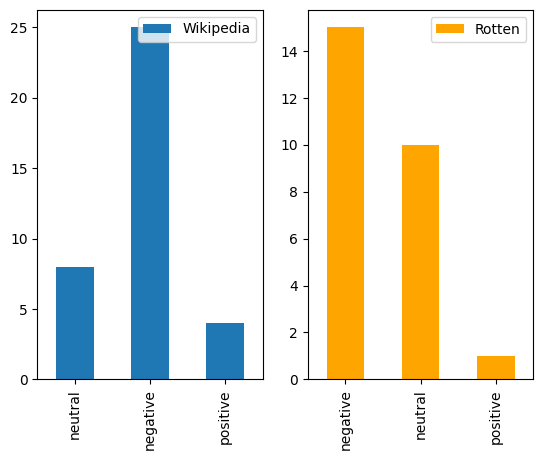

In [ ]:
'''
Создаем визуализацию: попробуйте использование новые данные (данные других url)
'''

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


df1 = pd.DataFrame.from_dict(sample1, orient='index', columns=['Wikipedia'])
df2 = pd.DataFrame.from_dict(sample2, orient='index', columns=['Rotten'])

fig, ax = plt.subplots(ncols=2)

ax[0] = df1.plot.bar(ax=ax[0])
ax[1] = df2.plot.bar(ax=ax[1], color='orange')

**Задача 5**

Соберите все 3 функции в одной ячейке ниже. Проанализируйте получшившийся код. Сделайте ревью!

Попробуйте сделать **рефакторинг**: найти повторы в коде, избыточные конструкции и заменить их на более простые и питоничные решения. Рефакторинг ускоряет выполнение кода и упрощает его чтение.

Улучшите код, добавьте строчки для вывода промежуточных и итоговых результатов; запустите ячейку.

Это творческое задание, правильных решений нет - главное, чтобы код работал! :)

Не забудьте закомментировать свои изменения.

In [ ]:
def scrape_text_from_url(url, tag, class_=None):
    import requests
    from bs4 import BeautifulSoup

    try:
        response = requests.get(url)# Выполняем HTML-запрос
        if response.status_code == 200: # Если запрос успешный (возвращаем значение 200)
            soup = BeautifulSoup(response.text, 'html.parser') # парсим контент или текст с помощью BeautifulSoup html.parser

            paragraphs = soup.find_all(tag, class_=class_) # Ищем теги и классы на основании аргументов функции

            text = "" # Создаем переменную text для накопления текста
            # Перебираем элементы paragraphs и извлекаем текстовые данные
            for p in paragraphs:
                text += p.get_text() + "\n"

            return text
        else:
            # Иначе выводим статус-код и сообщение об ошибке
            return f"Ошибка: не удалось получить доступ к странице. Статус-код: {response.status_code}"
    except Exception as e:
        # Обрабатываем возможные ошибки
        return f"Произошла ошибка: {str(e)}"

nlp = spacy.load("en_core_web_sm")

def analyze_sentiment (text, positive_words, negative_words):
    doc = nlp(text.lower()) #обработка текста через spacy
    words = [token.text for token in doc if not token.is_stop and not token.is_punct] # Извлечение токенов без стоп-слов и знаков препинания

    # Считаем скор тональности: количество пересечений между списками words и положительными / отрицательными словами
    positive_count = sum(1 for word in words if word in positive_words)
    negative_count = sum(1 for word in words if word in negative_words)

# Определение тональности
    if positive_count > negative_count:
        return 'positive'
    elif negative_count > positive_count:
        return 'negative'
    else:
        return 'neutral'


def analyze(positive_words, negative_words, url, tag, class_=None):
  # примените функцию scrape_text_from_url
    scraped_text = scrape_text_from_url(url, tag, class_)

    # сегментируйте текст по предложениям (чеорез точку)
    doc = nlp(scraped_text)
    sentences = [sent.text for sent in doc.sents]

    # создаем пустой список, куда запишем скоры
    sentiments = []

    # начинаем перебор по предложениям
    for sentence in sentences:
      # получаем скор для данного предложения с помощью функции analyze_sentiment
        score = analyze_sentiment(sentence, positive_words, negative_words)
      # добавляем скор в созданный список
        sentiments.append(score)

    # Возвращаем список скоров
    return sentiments


In [ ]:
# Импортируем нужные библиотеки
import requests
from bs4 import BeautifulSoup
import spacy
# Загружаем модель spaCy
nlp = spacy.load("en_core_web_sm")

def scrape_text_from_url(url, tag, class_=None):
    try:
        response = requests.get(url)# Выполняем HTML-запрос
        if response.status_code == 200: # Если запрос успешный (возвращаем значение 200)
            soup = BeautifulSoup(response.text, 'html.parser') # парсим контент или текст с помощью BeautifulSoup html.parser

            paragraphs = soup.find_all(tag, class_=class_) # Ищем теги и классы на основании аргументов функции

            text = "" # Создаем переменную text для накопления текста
            # Перебираем элементы paragraphs и извлекаем текстовые данные
            for p in paragraphs:
                text += p.get_text() + "\n"

            return text
        else:
            # Иначе выводим статус-код и сообщение об ошибке
            return f"Ошибка: не удалось получить доступ к странице. Статус-код: {response.status_code}"
    except Exception as e:
        # Обрабатываем возможные ошибки
        return f"Произошла ошибка: {str(e)}"

def analyze_sentiment(text, positive_words, negative_words):
    """
    Анализ тональности текста на основе списков положительных и отрицательных слов.
    """
    doc = nlp(text.lower())
    words = [token.lemma_ for token in doc if not token.is_stop and not token.is_punct]

    positive_count = sum(word in positive_words for word in words)
    negative_count = sum(word in negative_words for word in words)

    if positive_count > negative_count:
        return 'positive'
    elif negative_count > positive_count:
        return 'negative'
    else:
        return 'neutral'

def analyze(positive_words, negative_words, url, tag, class_=None):
    """
    Выполняет анализ тональности текста по URL.
    """
    scraped_text = scrape_text_from_url(url, tag, class_)
    if "Ошибка" in scraped_text: # # Если в тексте содержится сообщение об ошибке (Ошибка: не удалось получить доступ к странице), возвращаем его
        return [scraped_text]

    doc = nlp(scraped_text)
    sentences = [sent.text for sent in doc.sents]   # Сегментируем текст на предложения и сохраняем их в список

    sentiments = [analyze_sentiment(sentence, positive_words, negative_words) for sentence in sentences]  # Для каждого предложения вычисляем его тональность с использованием функции analyze_sentiment
    return sentiments
